In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

In [7]:
data,target = make_hastie_10_2()
target.shape

(12000,)

In [8]:
data.shape

(12000, 10)

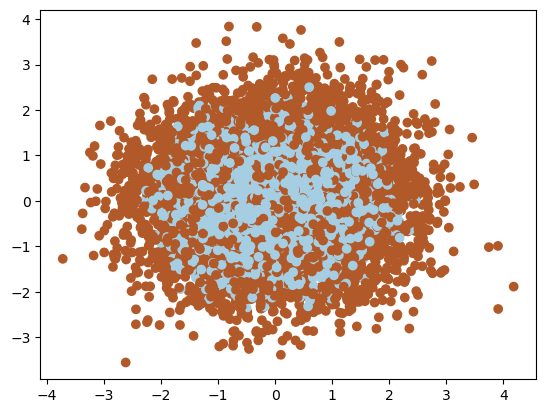

In [9]:
plt.scatter(data[:,-2],data[:,-1],c=target,cmap=plt.cm.Paired)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=33)
X_train.shape

(9600, 10)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time

In [14]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=AdaBoostClassifier()
clf4=svm.SVC(C=1.0,kernel='rbf',decision_function_shape='ovr',gamma=0.01)
clf5=KNeighborsClassifier(n_neighbors=5)

classifiers = [clf1, clf2, clf3, clf4, clf5]
labels = ['LogisticRegression', 'RandomForest', 'AdaBoost', 'SVM', 'KNN']
for clf, label in zip(classifiers, labels):
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    end = time.time()
    run_time = end - start
    print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f}), 耗时 {run_time:.2f} 秒. 模型名称[{label}]")

Accuracy: 0.5097 (+/- 0.0124), 耗时 0.17 秒. 模型名称[LogisticRegression]
Accuracy: 0.8873 (+/- 0.0078), 耗时 26.42 秒. 模型名称[RandomForest]
Accuracy: 0.8834 (+/- 0.0083), 耗时 4.72 秒. 模型名称[AdaBoost]
Accuracy: 0.9757 (+/- 0.0035), 耗时 5.53 秒. 模型名称[SVM]
Accuracy: 0.7237 (+/- 0.0132), 耗时 0.63 秒. 模型名称[KNN]
